In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

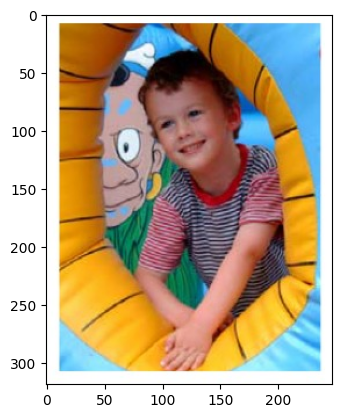

In [3]:
img = cv2.imread('images/image_child.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

In [4]:
pix_vals = img.reshape((-1, 3))
pix_vals = np.float32(pix_vals)

In [5]:
pix_vals.shape

(78793, 3)

## Helper functions

In [6]:
#K-means random initialization
def random_initialization(pix_vals, k):
    centroids = pix_vals[np.random.choice(pix_vals.shape[0], k, replace=False)]
    return centroids

In [7]:
#K-means ++ initialization
def kmeans_plus_plus_initialization(pix_vals, k):
    centroids = []
    centroids.append(pix_vals[np.random.randint(pix_vals.shape[0])])
    for _ in range(1, k):
        dist = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in pix_vals])
        probs = dist/dist.sum()
        cumulative_probs = probs.cumsum()   
        r = np.random.rand()
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        centroids.append(pix_vals[i])
    return np.array(centroids)

In [8]:
#distance function
def V(v1, v2):
    return np.linalg.norm(v1 - v2)

In [9]:
#E step
#Assign clusters to each pixel
def assign_clusters(pix_vals, centroids):
    clusters = np.zeros(len(pix_vals))
    for i, pix in enumerate(pix_vals):
        distances = [V(pix, centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

#M step
#Update centroids based on the assigned clusters
def update_centroids(pix_vals, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster = pix_vals[clusters == i]
        new_centroids.append(np.mean(cluster, axis=0))
    return np.array(new_centroids)

# K-means++ initialization

## k = 2

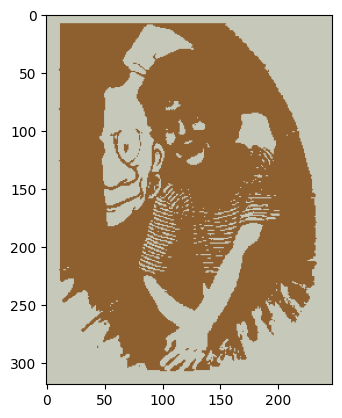

In [21]:
# Number of clusters
k = 2

# Intialize using k-means++
centroids = kmeans_plus_plus_initialization(pix_vals, k)

new_centroids = np.zeros(centroids.shape)

# Assign clusters and update centroids until convergence
while np.linalg.norm(centroids - new_centroids) > 0.1:
    clusters = assign_clusters(pix_vals, centroids)
    new_centroids = update_centroids(pix_vals, clusters, k)
    centroids = new_centroids

# Assign clusters to each pixel
clusters = assign_clusters(pix_vals, centroids)

# Replace each pixel with its corresponding centroid
segemented_img = np.array([centroids[int(i)] for i in clusters])

# Reshape the image
segemented_img = segemented_img.reshape(img.shape)

plt.imshow(segemented_img.astype(np.uint8))


## k = 3

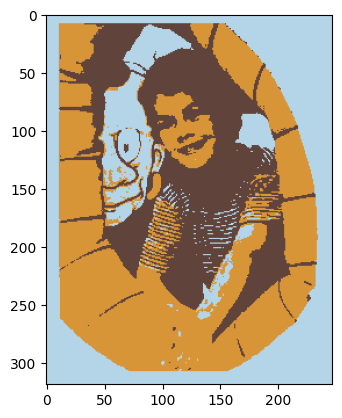

In [46]:
# Number of clusters
k = 3

# Intialize using k-means++
centroids = kmeans_plus_plus_initialization(pix_vals, k)

new_centroids = np.zeros(centroids.shape)

# Assign clusters and update centroids until convergence
while np.linalg.norm(centroids - new_centroids) > 0.1:
    clusters = assign_clusters(pix_vals, centroids)
    new_centroids = update_centroids(pix_vals, clusters, k)
    centroids = new_centroids

# Assign clusters to each pixel
clusters = assign_clusters(pix_vals, centroids)

# Replace each pixel with its corresponding centroid
segemented_img = np.array([centroids[int(i)] for i in clusters])

# Reshape the image
segemented_img = segemented_img.reshape(img.shape)

plt.imshow(segemented_img.astype(np.uint8))


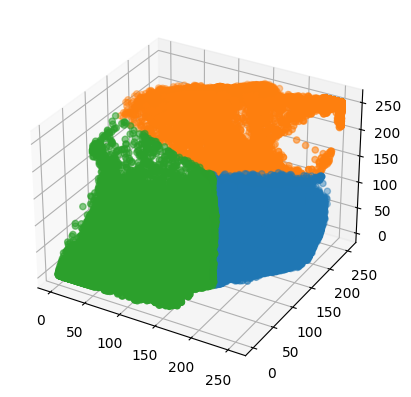

In [47]:
#plotting final clusters 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    cluster = pix_vals[clusters == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2])

plt.show()

## k = 10

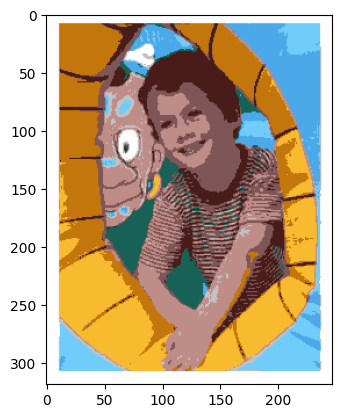

In [12]:
# Number of clusters
k = 10

# Intialize using k-means++
centroids = kmeans_plus_plus_initialization(pix_vals, k)

new_centroids = np.zeros(centroids.shape)

# Assign clusters and update centroids until convergence
while np.linalg.norm(centroids - new_centroids) > 0.1:
    clusters = assign_clusters(pix_vals, centroids)
    new_centroids = update_centroids(pix_vals, clusters, k)
    centroids = new_centroids

# Assign clusters to each pixel
clusters = assign_clusters(pix_vals, centroids)

# Replace each pixel with its corresponding centroid
segemented_img = np.array([centroids[int(i)] for i in clusters])

# Reshape the image
segemented_img = segemented_img.reshape(img.shape)

plt.imshow(segemented_img.astype(np.uint8))


# K-means with random initialization

## k = 2

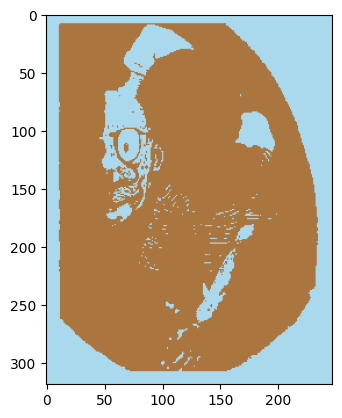

In [13]:
# Number of clusters
k = 2

# Intialize using k-means random initialization
centroids = random_initialization(pix_vals, k)

new_centroids = np.zeros(centroids.shape)

# Assign clusters and update centroids until convergence
while np.linalg.norm(centroids - new_centroids) > 0.1:
    clusters = assign_clusters(pix_vals, centroids)
    new_centroids = update_centroids(pix_vals, clusters, k)
    centroids = new_centroids

# Assign clusters to each pixel
clusters = assign_clusters(pix_vals, centroids)

# Replace each pixel with its corresponding centroid
segemented_img = np.array([centroids[int(i)] for i in clusters])

# Reshape the image
segemented_img = segemented_img.reshape(img.shape)

plt.imshow(segemented_img.astype(np.uint8))

## k = 3

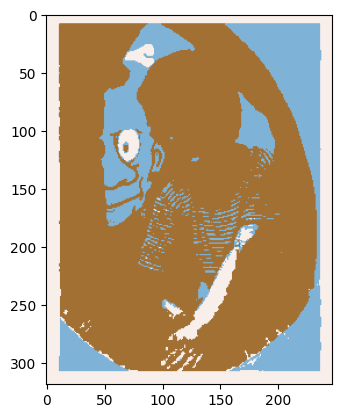

In [16]:
# Number of clusters
k = 3

# Intialize using k-means random initialization
centroids = random_initialization(pix_vals, k)

new_centroids = np.zeros(centroids.shape)

# Assign clusters and update centroids until convergence
while np.linalg.norm(centroids - new_centroids) > 0.1:
    clusters = assign_clusters(pix_vals, centroids)
    new_centroids = update_centroids(pix_vals, clusters, k)
    centroids = new_centroids

# Assign clusters to each pixel
clusters = assign_clusters(pix_vals, centroids)

# Replace each pixel with its corresponding centroid
segemented_img = np.array([centroids[int(i)] for i in clusters])

# Reshape the image
segemented_img = segemented_img.reshape(img.shape)

plt.imshow(segemented_img.astype(np.uint8))

## k = 10

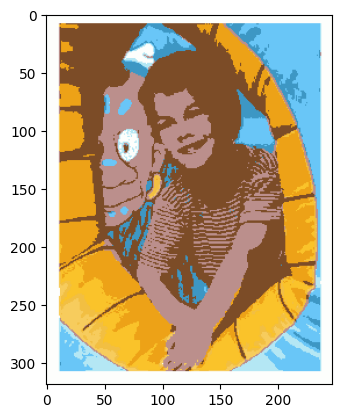

In [17]:
# Number of clusters
k = 10

# Intialize using k-means random initialization
centroids = random_initialization(pix_vals, k)

new_centroids = np.zeros(centroids.shape)

# Assign clusters and update centroids until convergence
while np.linalg.norm(centroids - new_centroids) > 0.1:
    clusters = assign_clusters(pix_vals, centroids)
    new_centroids = update_centroids(pix_vals, clusters, k)
    centroids = new_centroids

# Assign clusters to each pixel
clusters = assign_clusters(pix_vals, centroids)

# Replace each pixel with its corresponding centroid
segemented_img = np.array([centroids[int(i)] for i in clusters])

# Reshape the image
segemented_img = segemented_img.reshape(img.shape)

plt.imshow(segemented_img.astype(np.uint8))